## Uppgift E00

### Uppgift A

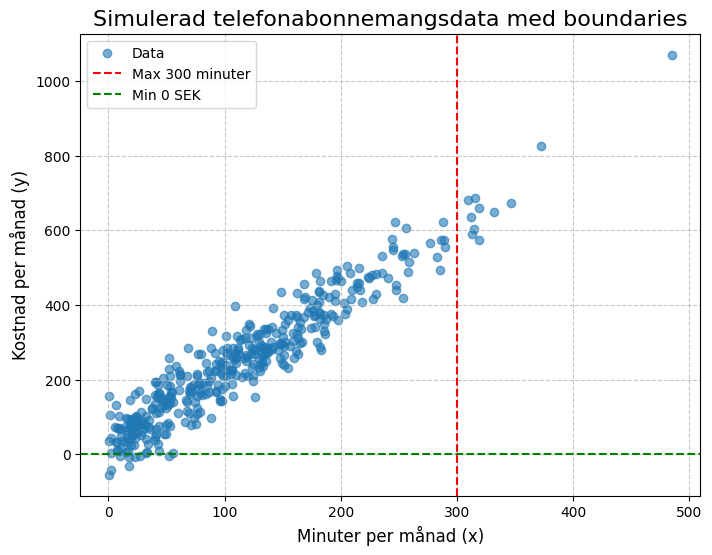

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Simulera data
np.random.seed(42)  # Sätt seed för reproducerbarhet
x = np.random.normal(loc=100, scale=100, size=400) 
x = np.abs(x)  # Simulera x-värden och ta absolutvärde
epsilon = np.random.normal(0, 50, 400)  # Simulera brus
y = 2 * x + 25 + epsilon  # Beräkna y-värden

# Plotta datasetet
plt.figure(figsize=(8, 6))  # Anpassa storleken på plotten
plt.scatter(x, y, alpha=0.6, label='Data')

# Lägg till boundaries
plt.axvline(x=300, color='red', linestyle='--', label='Max 300 minuter')  # Vertikal linje vid x=300
plt.axhline(y=0, color='green', linestyle='--', label='Min 0 SEK')  # Horisontell linje vid y=0

plt.title("Simulerad telefonabonnemangsdata med boundaries", fontsize=16)
plt.xlabel("Minuter per månad (x)", fontsize=12)
plt.ylabel("Kostnad per månad (y)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

Förklaring:

1: np.random.seed(42): Säkerställer att samma slumpmässiga värden genereras varje gång koden körs.

2: np.random.normal(100, 100, 400): Skapar 400 x-värden från en normalfördelning med medelvärde 100 och standardavvikelse 10.

3: np.abs(): Tar absolutvärdet av x-värdena för att undvika negativa minuter.

4: np.random.normal(0, 50, 400): Skapar 400 brusvärden från en normalfördelning med medelvärde 0 och standardavvikelse 50.

5: y = 2 * x + 25 + epsilon: Beräknar y-värdena med hjälp av den givna formeln.

6: plt.scatter(): Plottar datapunkterna för att visualisera datasetet.

## Uppgift B

Plocka bort outliers

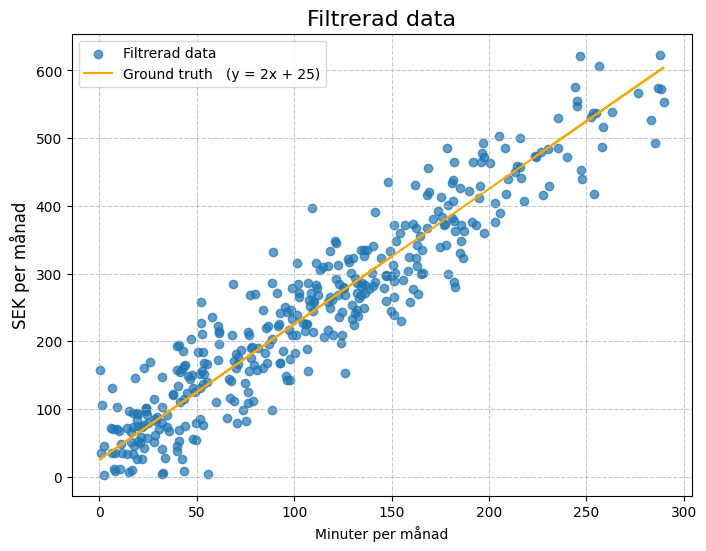

In [39]:
mask = (x <= 300) & (y >= 0)
filtered_x = x[mask]
filtered_y = y[mask]

# Plotta filtered dataset

plt.figure(figsize=(8, 6))
plt.scatter(filtered_x, filtered_y, alpha= 0.7, label="Filtrerad data")

#Rite en "ground truth"

plt.plot(filtered_x, 2 * filtered_x + 25, color="orange", label= "Ground truth (y = 2x + 25)" )
plt.title("Filtrerad data", fontsize= 16)
plt.ylabel("SEK per månad", fontsize= 12)
plt.xlabel("Minuter per månad")
plt.grid(True, linestyle="--", alpha= 0.7)
plt.legend()
plt.show()

## Uppgift C

Skapa en databas med värderna

In [41]:
import pandas as pd

df = pd.DataFrame({"Minuter": filtered_x, "SEK": filtered_y})

df.head()



,Minuter,SEK
0,149.671415,244.621448
1,86.173570,167.378389
2,164.768854,354.799893
3,252.302986,531.955001
4,76.584663,155.666051
